In [145]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import pandas as pd

In [165]:
def generate_y(X, noise):
    y = np.sin(X).ravel()*(X**3).ravel() + (1/X).ravel() + np.log(X).ravel() + np.random.normal(1,10,X.shape[0]) * noise
    return y

def generate_data(seed=42, n_samples=800, n_test_samples=200, noise=3):
    np.random.seed(seed)
    
    X = np.sort(5 * np.random.rand(n_samples, 1), axis=0)
    y = generate_y(X,noise)
    
    X_test = np.sort(5 * np.random.rand(n_test_samples, 1), axis=0)
    y_test = generate_y(X_test,noise)

    return X, y, X_test, y_test

def plot_polynomial_fit(X, y, degrees):
    X_range = np.linspace(0, 5, 100)[:, np.newaxis]
    plt.figure(figsize=(14, 5))
    
    for degree in degrees:
        polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
        linear_regression = LinearRegression()
        pipeline = make_pipeline(polynomial_features, linear_regression)
        pipeline.fit(X, y)
        y_pred_range = pipeline.predict(X_range)
        plt.plot(X_range, y_pred_range, label="Model degree {}".format(degree))
    
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Polynomial fit for different degrees on Train")
    plt.show()

def plot_error_vs_degree(X, y, X_test, y_test, degrees):
    train_error = []
    test_error = []
    for degree in degrees:
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(X, y)
        train_error.append(mean_squared_error(y, model.predict(X)))
        test_error.append(mean_squared_error(y_test, model.predict(X_test)))

    plt.figure(figsize=(8, 6))
    plt.plot(degrees, train_error, label='Train')
    plt.plot(degrees, test_error, label='Test')
    plt.yscale("log")
    plt.xlabel("Polynomial degree")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.title("Error vs. Polynomial degree")
    plt.show()

def plot_ridge_regularization(X, y, degrees, alphas=[0, 0.01, 1]):
    X_range = np.linspace(0, 5, 100)[:, np.newaxis]
    
    for alpha in alphas:
        plt.figure(figsize=(14, 5))
        for i, degree in enumerate(degrees):
            ax = plt.subplot(1, len(degrees), i + 1)
            plt.setp(ax, xticks=(), yticks=())
            
            model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
            model.fit(X, y)
            y_pred = model.predict(X_range)
            
            plt.plot(X_range, y_pred, label="Degree {}".format(degree))
            plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
            plt.title("Degree {}\nMSE = {:.2e}".format(degree, mean_squared_error(y, model.predict(X))))
            plt.legend(loc="best")
        
        plt.suptitle("Ridge Regularization with Alpha {}".format(alpha))
        plt.show()

def plot_lasso_regularization(X, y, degrees, alphas=[0, 0.01, 1]):
    X_range = np.linspace(0, 5, 100)[:, np.newaxis]
    
    for alpha in alphas:
        plt.figure(figsize=(14, 5))
        for i, degree in enumerate(degrees):
            ax = plt.subplot(1, len(degrees), i + 1)
            plt.setp(ax, xticks=(), yticks=())
            
            model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
            model.fit(X, y)
            y_pred = model.predict(X_range)
            
            plt.plot(X_range, y_pred, label="Degree {}".format(degree))
            plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
            plt.title("Degree {}\nMSE = {:.2e}".format(degree, mean_squared_error(y, model.predict(X))))
            plt.legend(loc="best")
        
        plt.suptitle("Ridge Regularization with Alpha {}".format(alpha))
        plt.show()

def boxplot_ridge_test_errors(X, y, X_test, y_test, degrees, alphas=[0.01, 0.1, 1, 10]):
    errors = []

    for degree in degrees:
        # Linear Regression
        model_linear = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model_linear.fit(X, y)
        y_pred_linear = model_linear.predict(X_test)
        errors_ = pd.DataFrame({'alpha':[0]*y_test.shape[0], 'degree':[degree]*y_test.shape[0],'error':y_test - y_pred_linear})
        errors.append(errors_)
        for alpha in alphas:
            # Ridge Regression
            model_ridge = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
            model_ridge.fit(X, y)
            y_pred_ridge = model_ridge.predict(X_test)
            errors_ = pd.DataFrame({'alpha':[alpha]*y_test.shape[0], 'degree':[degree]*y_test.shape[0],'error':y_test - y_pred_ridge})
            errors.append(errors_)
               
    errors = pd.concat(errors, ignore_index=True)
    print(errors.groupby(['degree','alpha'])['error'].describe())

    for d in degrees:
        errors_ = errors[errors['degree']==d]
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=errors['alpha'], y=errors['error'])
        plt.title(f"Ridge Regression Errors - Degree {d}")
        plt.xlabel("Alpha")
        plt.ylabel("Error")
        plt.show()






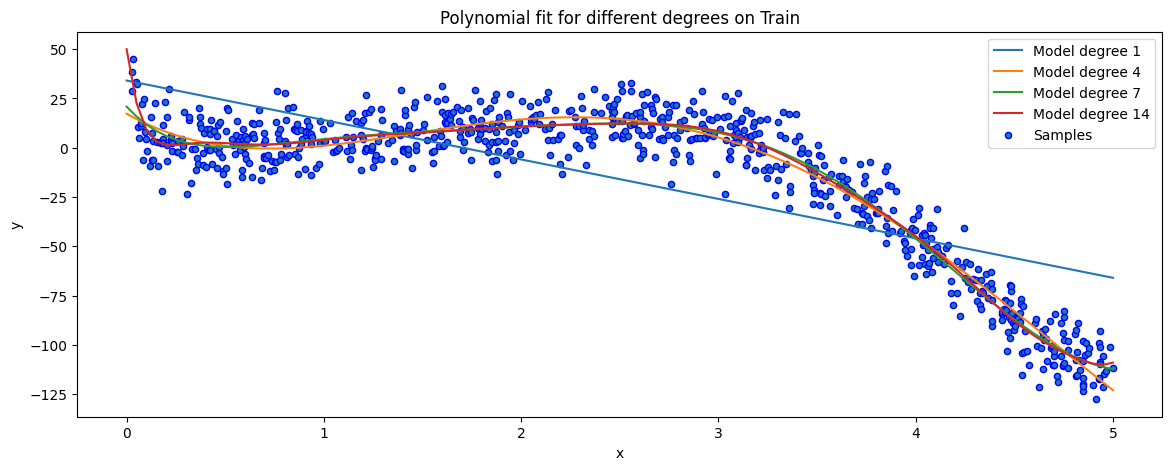

In [166]:
# Celda interactiva para jugar con los grados del polinomio

# Generamos los datos
noise = 1
X, y, X_test, y_test = generate_data(noise=noise)

# Prueba con un polinomio de grado n (puedes cambiar este valor y re-ejecutar la celda para ver los resultados)
degrees = [1, 4, 7,14]
plot_polynomial_fit(X, y, degrees)


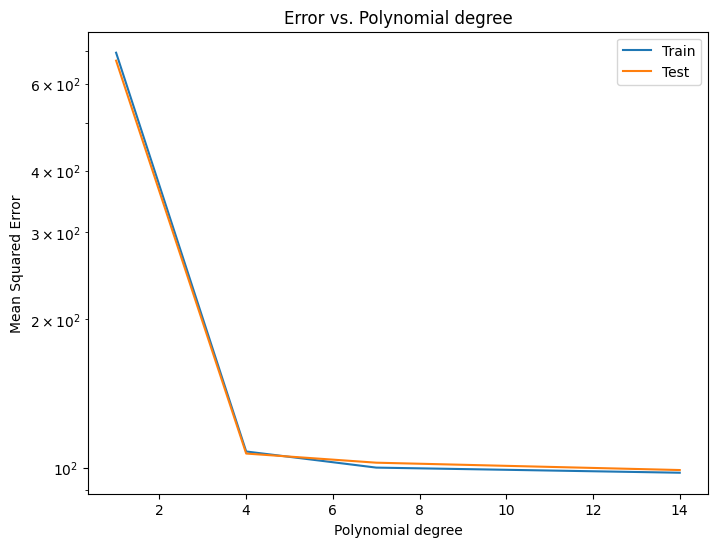

In [167]:
# Visualiza cómo cambia el error con respecto al grado del polinomio
plot_error_vs_degree(X, y, X_test, y_test, degrees)

Regresion Ridge (hace coeficientes pequennos pero no los convierte en cero)

/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.74325e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


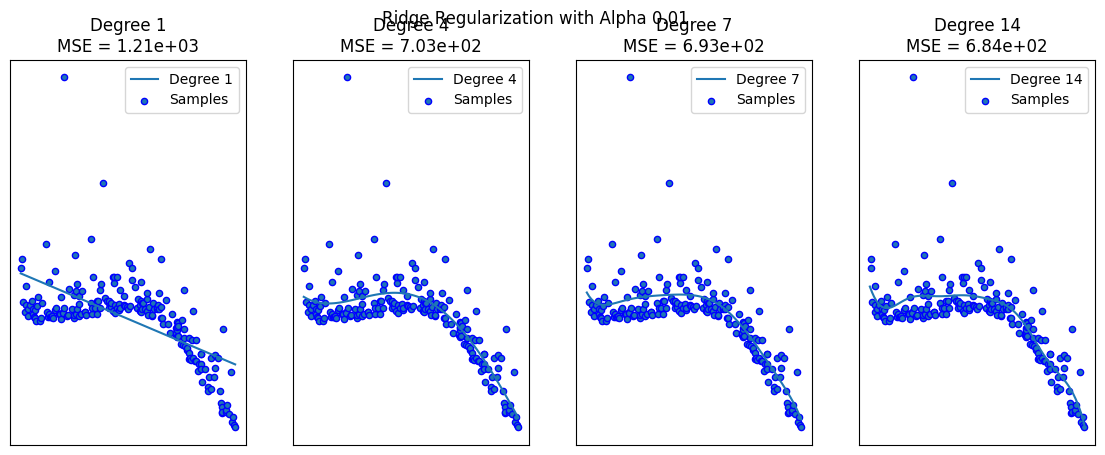

/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.57726e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


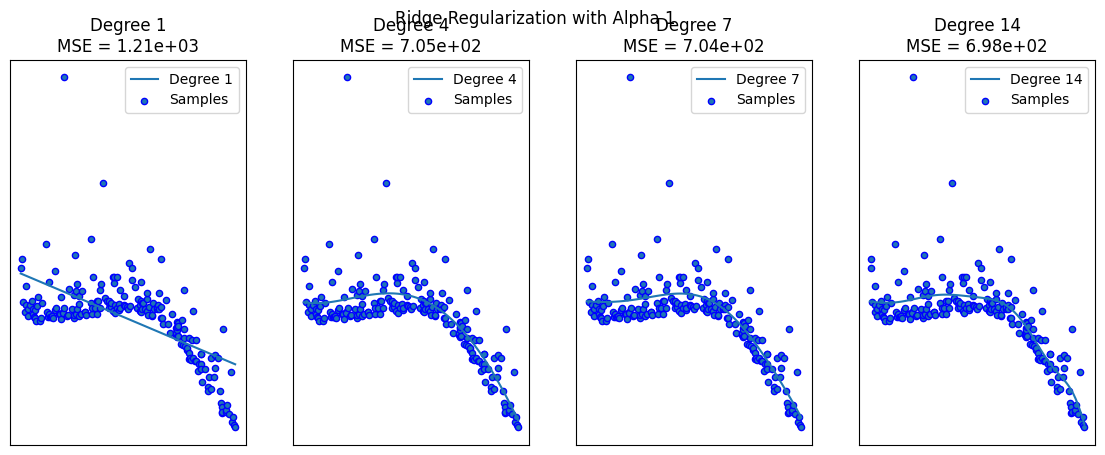

/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.84583e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


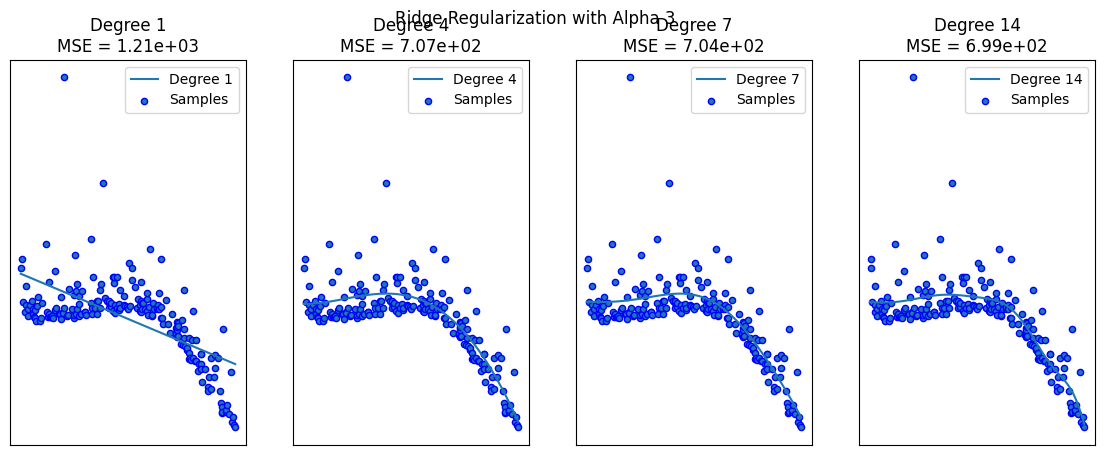

In [149]:
# Prueba la regularización Ridge con un polinomio de alto grado
plot_ridge_regularization(X_test, y_test, degrees, alphas=[0.01, 1, 3])

/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.05649e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.05649e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.71695e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


              count      mean        std        min        25%       50%  \
degree alpha                                                               
1      0.000  200.0  3.019393  34.881016 -66.557110 -20.147024  4.999786   
       0.001  200.0  3.019392  34.881016 -66.557139 -20.147018  4.999795   
       0.010  200.0  3.019388  34.881016 -66.557401 -20.146962  4.999871   
       1.000  200.0  3.018957  34.881030 -66.586191 -20.140845  5.008255   
       3.000  200.0  3.018089  34.881083 -66.644252 -20.128508  5.025162   
4      0.000  200.0  1.183847  26.718740 -22.124423 -12.386714 -6.565060   
       0.001  200.0  1.183883  26.718559 -22.123216 -12.385158 -6.564750   
       0.010  200.0  1.184204  26.716947 -22.112398 -12.371209 -6.561978   
       1.000  200.0  1.208912  26.633837 -21.271072 -12.383409 -6.320085   
       3.000  200.0  1.231013  26.627917 -22.445661 -12.222622 -6.132344   
7      0.000  200.0  0.952301  26.669596 -25.216603 -12.439306 -6.615215   
       0.001

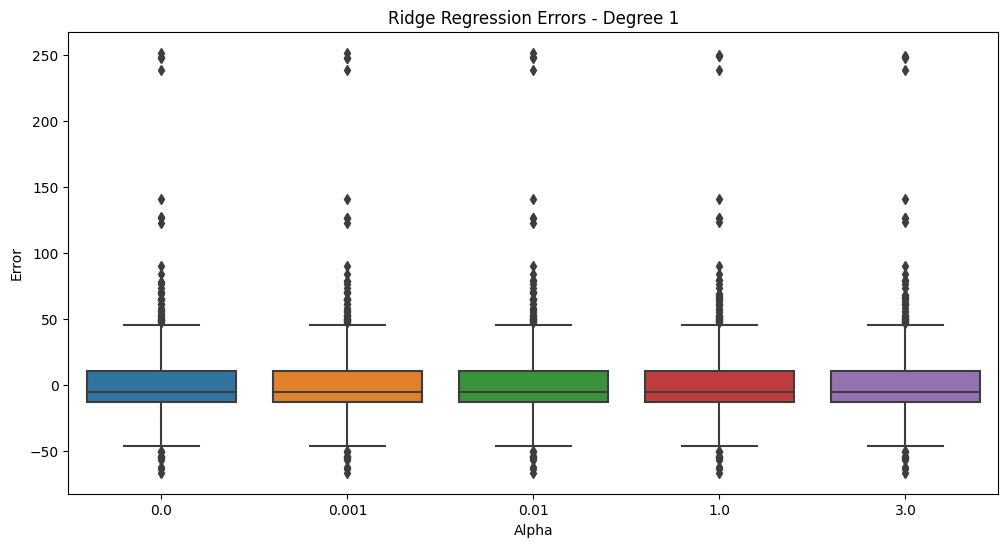

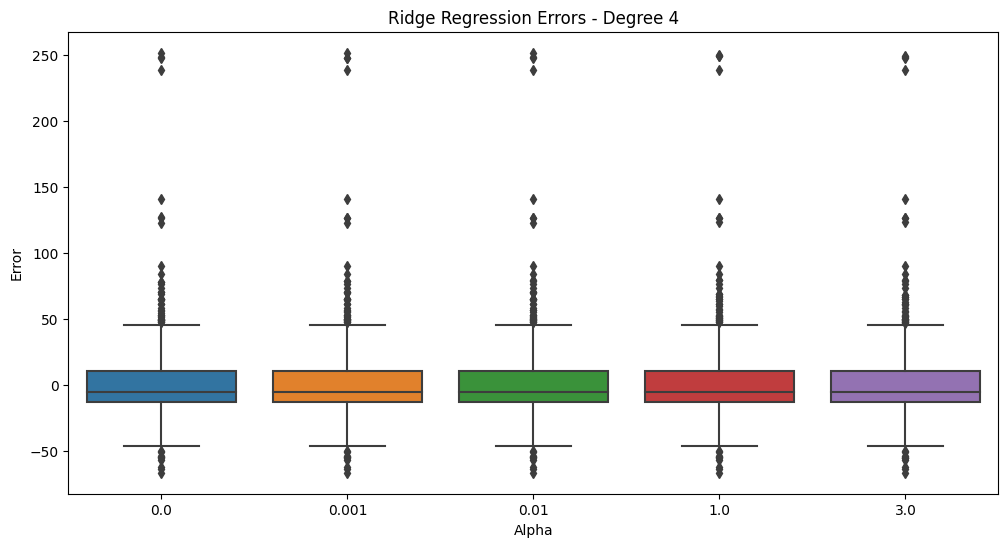

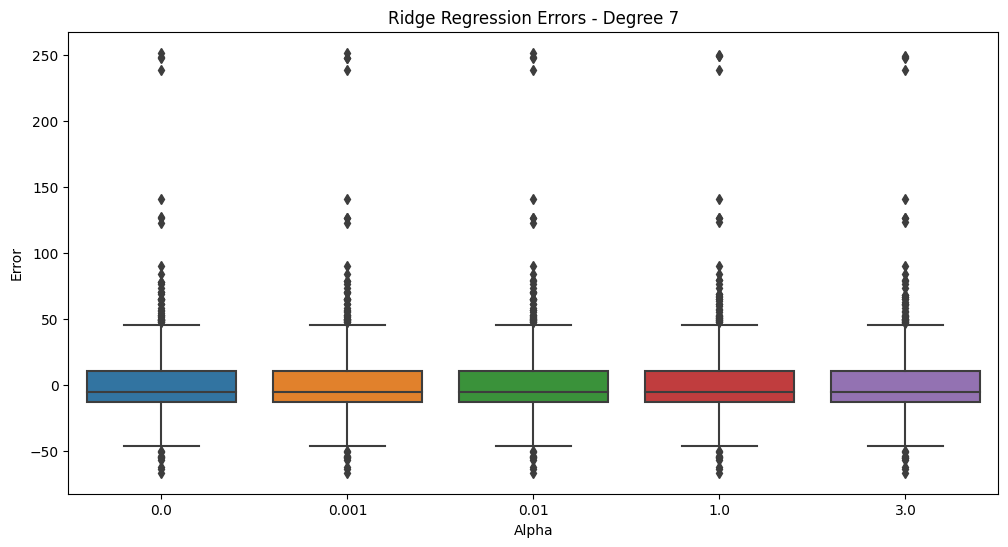

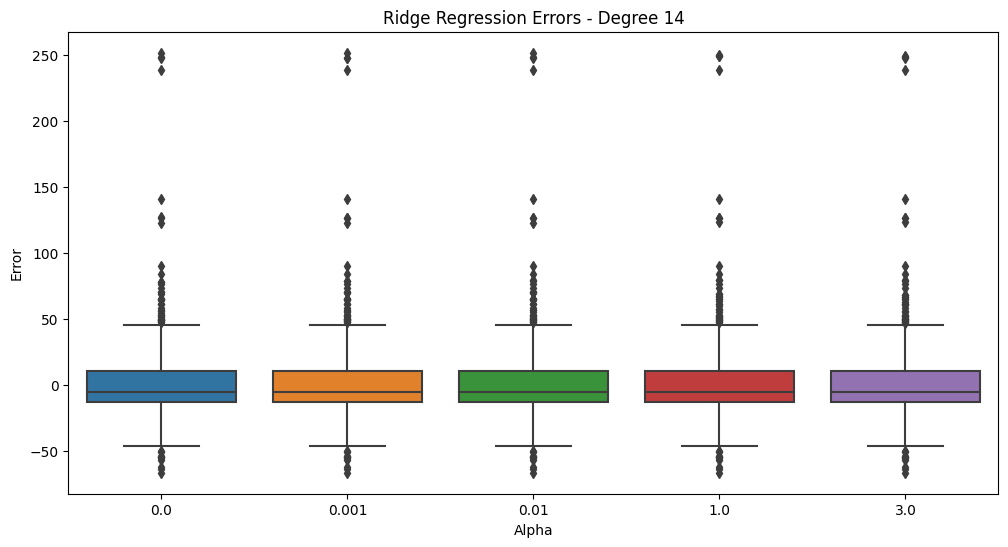

In [152]:
 boxplot_ridge_test_errors(X, y, X_test, y_test, degrees, alphas=[.001, 0.01, 1, 3])

Regresion Lasso (puede convertir coeficientes de variables en cero)

/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.081e+04, tolerance: 4.048e+01
  model = cd_fast.enet_coordinate_descent(
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.054e+04, tolerance: 4.048e+01
  model = cd_fast.enet_coordinate_descent(
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

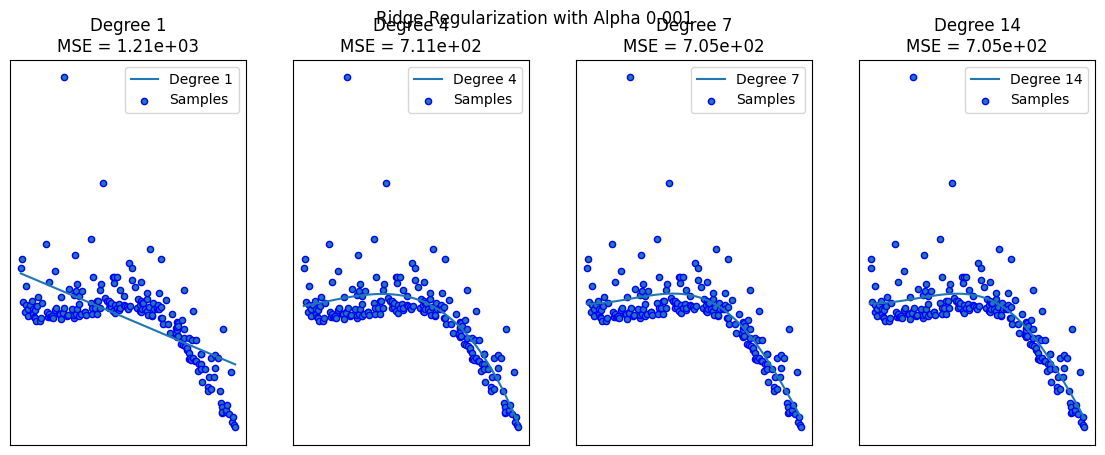

/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.807e+04, tolerance: 4.048e+01
  model = cd_fast.enet_coordinate_descent(
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.051e+04, tolerance: 4.048e+01
  model = cd_fast.enet_coordinate_descent(
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

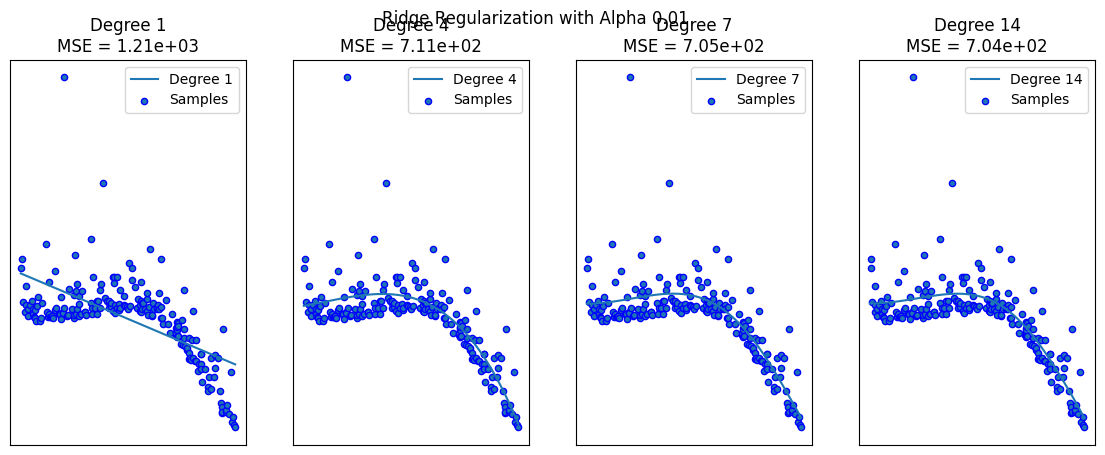

/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.810e+01, tolerance: 4.048e+01
  model = cd_fast.enet_coordinate_descent(
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.748e+04, tolerance: 4.048e+01
  model = cd_fast.enet_coordinate_descent(
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

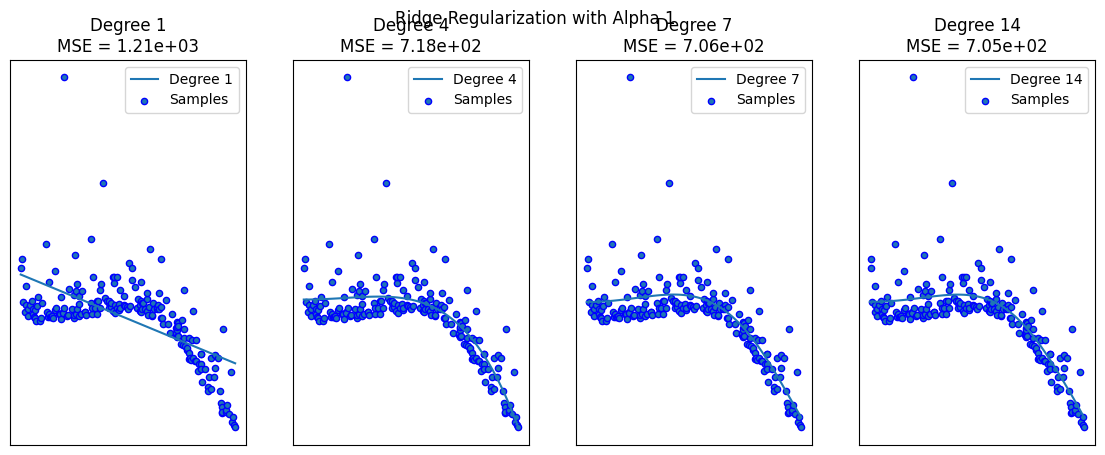

/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.921e+01, tolerance: 4.048e+01
  model = cd_fast.enet_coordinate_descent(
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.752e+04, tolerance: 4.048e+01
  model = cd_fast.enet_coordinate_descent(
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

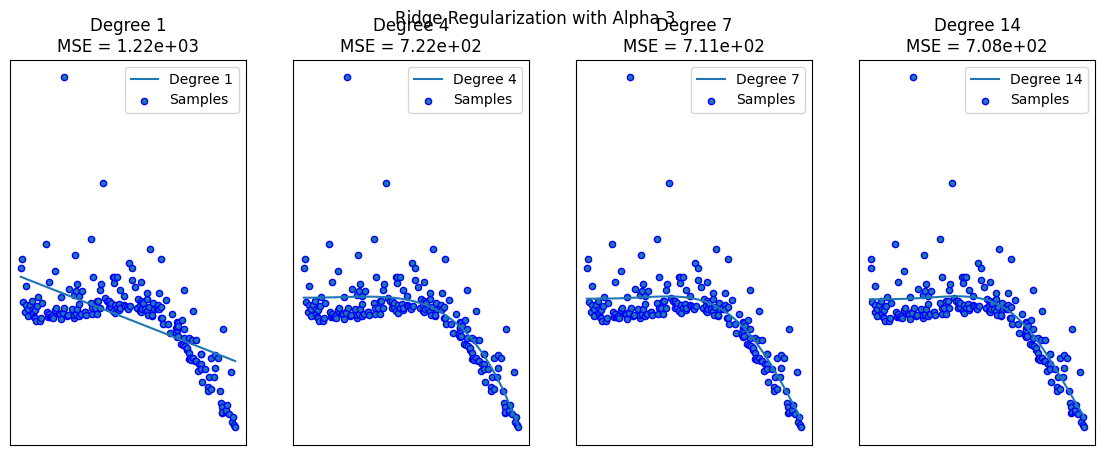

In [151]:
# Prueba la regularización lasso con un polinomio de alto grado
plot_lasso_regularization(X_test, y_test, degrees, alphas=[.001, 0.01, 1, 3])